In [158]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import imutils
import math

In [169]:
image = cv2.imread("Samples/Test1.png")

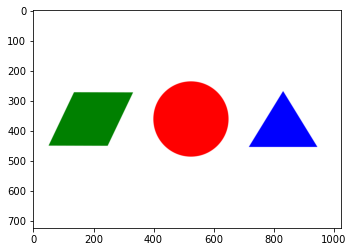

In [170]:
plt.imshow(image)
plt.show()

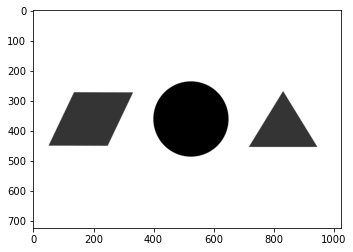

In [171]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap= 'gray')
plt.show()

In [172]:
thresh = cv2.threshold(gray,240, 255, cv2.THRESH_BINARY)[1]
edges = cv2.Canny(thresh,100,200)

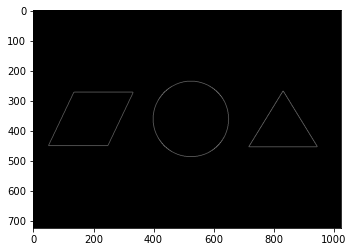

In [173]:
plt.imshow(edges,cmap= 'gray')
plt.show()

In [174]:
#cnts = cv2.drawContours(thresh,cnts,-1, (0,,0), 3)



In [175]:
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [176]:
print(len(contours))
for c in contours :
    print("contours starts at")
    print(c)
    print("ends")

4
contours starts at
[[[   0    0]]

 [[   0  723]]

 [[1023  723]]

 [[1023    0]]]
ends
contours starts at
[[[136 272]]

 [[332 272]]

 [[333 273]]

 [[333 274]]

 [[332 275]]

 [[332 276]]

 [[331 277]]

 [[331 278]]

 [[330 279]]

 [[330 281]]

 [[329 282]]

 [[329 283]]

 [[328 284]]

 [[328 285]]

 [[327 286]]

 [[327 287]]

 [[326 288]]

 [[326 289]]

 [[325 290]]

 [[325 291]]

 [[324 292]]

 [[324 293]]

 [[323 294]]

 [[323 295]]

 [[322 296]]

 [[322 297]]

 [[321 298]]

 [[321 299]]

 [[320 300]]

 [[320 301]]

 [[319 302]]

 [[319 304]]

 [[318 305]]

 [[318 306]]

 [[317 307]]

 [[317 308]]

 [[316 309]]

 [[316 310]]

 [[315 311]]

 [[315 312]]

 [[314 313]]

 [[314 314]]

 [[313 315]]

 [[313 316]]

 [[312 317]]

 [[312 318]]

 [[311 319]]

 [[311 320]]

 [[310 321]]

 [[310 322]]

 [[309 323]]

 [[309 325]]

 [[308 326]]

 [[308 327]]

 [[307 328]]

 [[307 329]]

 [[306 330]]

 [[306 331]]

 [[305 332]]

 [[305 333]]

 [[304 334]]

 [[304 335]]

 [[303 336]]

 [[303 33

In [177]:
#image = cv2.rectangle(image,(0,0), end, color, thickness) 

In [178]:
i=0
for c in contours:
    perimeter = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.01*perimeter,True)
    if(len(approx)== 4):
        (x, y, w, h) = cv2.boundingRect(approx)
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
        ar = w/float(h)
        print(f"aspect ratio{ar}")
        if(ar >=0.95 and ar <=1.05):
            pts = approx.reshape(4, 2)
            print(pts)
            rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
            s = pts.sum(axis = 1)
            rect[0] = pts[np.argmin(s)]
            rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
            diff = np.diff(pts, axis = 1)
            rect[1] = pts[np.argmin(diff)]
            rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
            print(rect)
            print("above rect")
            x1= rect[0][0]
            y1= rect[0][1]
            x2= rect[1][0]
            y2= rect[1][1]
            x3= rect[2][0]
            y3= rect[2][1]
            x4= rect[3][0]
            y4= rect[3][1]
            dist1 = math.sqrt((x3 - x1)**2 + (y3 - y1)**2)
            dist2 = math.sqrt((x4 - x2)**2 + (y4 - y2)**2)
            print(dist1)
            print(dist2)
            
            if((dist1 -dist2)//dist1)<=0.2:
                    print("square")
            else:
                    print("rhombus")
            print("jhvjvjvjvjh")
            cv2.drawContours(image,contours,i, (0,0,0), 3)
            i+=1
            plt.imshow(image,cmap= 'gray')
            plt.show()
        else:
            pts = approx.reshape(4, 2)
            print(pts)
            print("parallelogram or trapezium")

aspect ratio1.4143646408839778
[[   0    0]
 [   0  723]
 [1023  723]
 [1023    0]]
parallelogram or trapezium
aspect ratio1.5722222222222222
[[136 272]
 [333 273]
 [248 451]
 [ 51 450]]
parallelogram or trapezium


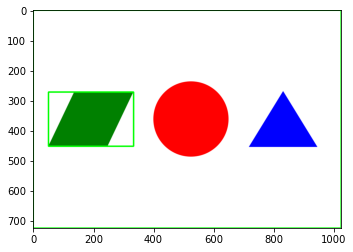

In [179]:
plt.imshow(image,cmap= 'gray')
plt.show()